In [2]:
import numpy as np
import torch

# 设置随机种子以确保可重复性
np.random.seed(42)
torch.manual_seed(42)

# 生成正态分布数据
mu = 0  # 均值
sigma = 1  # 标准差
n_samples = 1000  # 样本数量

# 使用 NumPy 生成
data_np = np.random.normal(mu, sigma, n_samples)

# 使用 PyTorch 生成
data_torch = torch.normal(mu, sigma, size=(n_samples,))  # 修正了参数传递方式

print("NumPy 生成的正态分布数据的统计信息:")
print(f"均值: {np.mean(data_np):.4f}")
print(f"标准差: {np.std(data_np):.4f}")

print("\nPyTorch 生成的正态分布数据的统计信息:")
print(f"均值: {torch.mean(data_torch).item():.4f}")
print(f"标准差: {torch.std(data_torch).item():.4f}")


NumPy 生成的正态分布数据的统计信息:
均值: 0.0193
标准差: 0.9787

PyTorch 生成的正态分布数据的统计信息:
均值: 0.0042
标准差: 1.0035


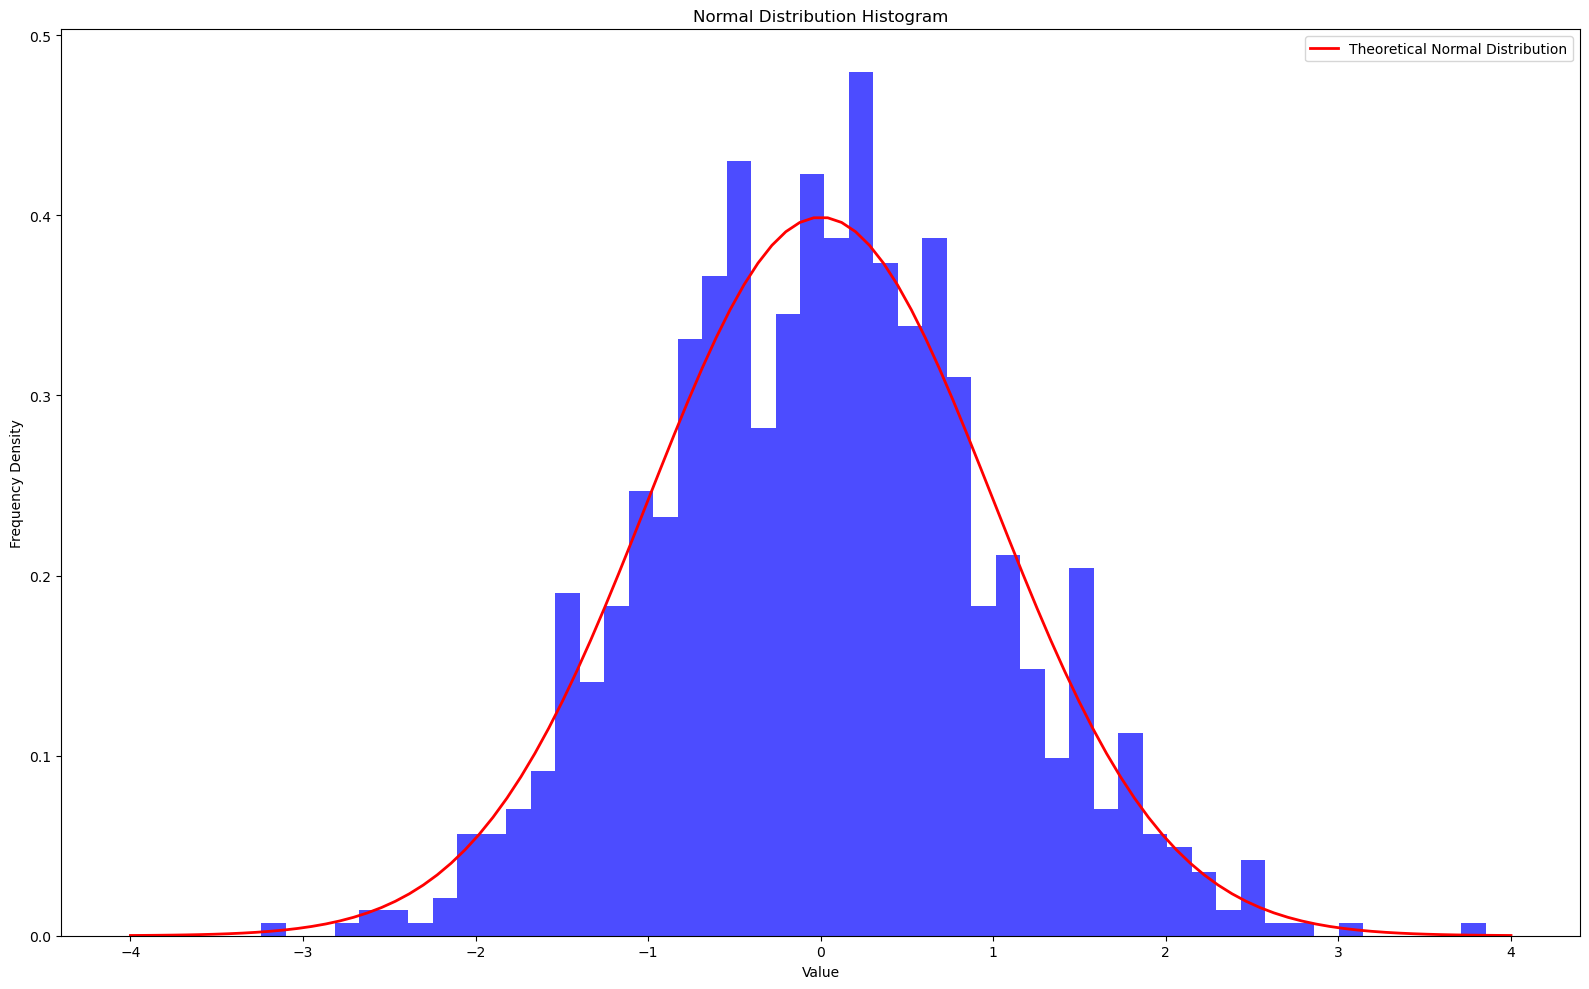

In [8]:
import matplotlib.pyplot as plt

# Create figure and subplot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot histogram
ax.hist(data_np, bins=50, density=True, alpha=0.7, color="blue")
ax.set_title("Normal Distribution Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency Density")

# Plot theoretical normal distribution curve
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) ** 2) / (2 * sigma**2))
ax.plot(x, y, "r-", lw=2, label="Theoretical Normal Distribution")
ax.legend()

plt.tight_layout()
plt.show()

In [10]:
import numpy as np
from scipy.special import gamma

def sphere_volume(n, r=1):
    """计算n维球的体积
    
    参数:
        n: 维度
        r: 半径(默认为1)
    """
    return (np.pi ** (n/2) * r**n) / gamma(n/2 + 1)

# 计算100维单位球的体积
dim = 100
volume = sphere_volume(dim)

print(f"{dim}维单位球的体积为: {volume:.2e}")

# 计算100维单位球的一些特性
r_values = [0.5, 0.9, 0.99, 1.0]
volumes_r = [sphere_volume(dim, r) for r in r_values]

print("\n100维球在不同半径下的体积:")
for r, v in zip(r_values, volumes_r):
    print(f"半径 = {r:.2f}: {v:.2e}")

# 计算体积比例
print("\n体积比例分析:")
for i in range(len(r_values)-1):
    ratio = volumes_r[i] / volumes_r[-1]
    print(f"半径为{r_values[i]:.2f}的球体积占单位球体积的比例: {ratio:.2e}")


100维单位球的体积为: 2.37e-40

100维球在不同半径下的体积:
半径 = 0.50: 1.87e-70
半径 = 0.90: 6.29e-45
半径 = 0.99: 8.67e-41
半径 = 1.00: 2.37e-40

体积比例分析:
半径为0.50的球体积占单位球体积的比例: 7.89e-31
半径为0.90的球体积占单位球体积的比例: 2.66e-05
半径为0.99的球体积占单位球体积的比例: 3.66e-01


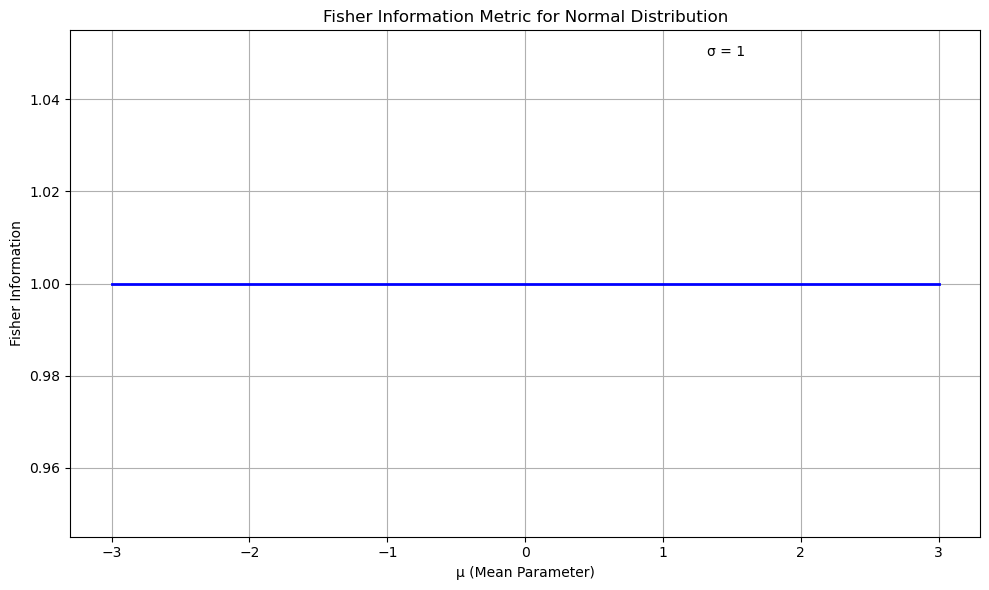

对于均值参数μ的Fisher信息度量:
1. 在σ = 1时,Fisher信息度量恒为1.0
2. Fisher信息度量表示参数空间中的局部几何结构
3. 较大的Fisher信息值表示参数变化对分布影响更显著


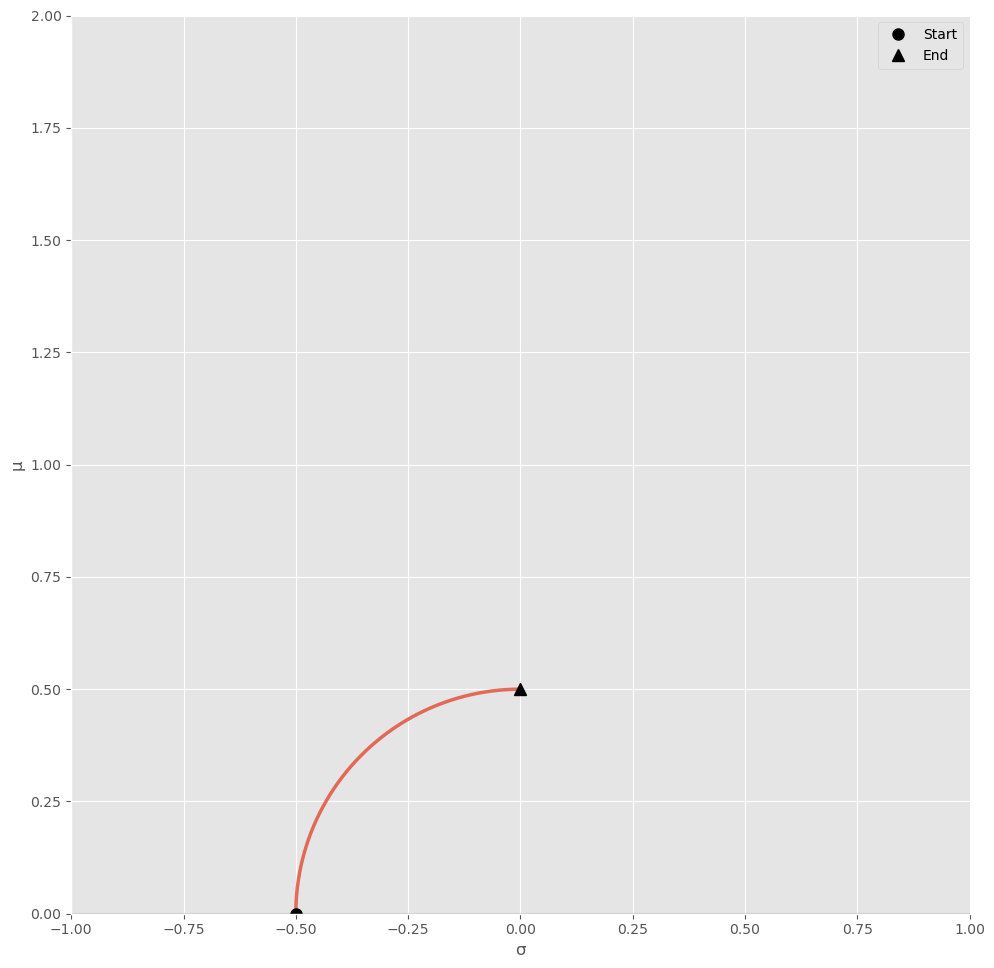

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Set ggplot style
plt.style.use('ggplot')

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# Set axis limits
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)  # Adjust y-axis range to match x-axis

# Draw upper half-plane boundary
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Draw a smooth geodesic arc
# Adjust center and radius to make geodesic start from (0,0)
center, radius = (0, 0.5)  # Adjust center and radius to make curve pass through origin
theta = np.linspace(np.pi/2, np.pi, 200)  # Increase points for smoother curve
x = center + radius * np.cos(theta)
y = radius * np.sin(theta)
ax.plot(x, y, linewidth=2.5, alpha=0.8)  # ggplot style will set color automatically

# Mark start and end points
start_point = (-0.5, 0)
end_point = (0, 0.5)
ax.plot(start_point[0], start_point[1], 'ko', markersize=8, label='Start')
ax.plot(end_point[0], end_point[1], 'k^', markersize=8, label='End')
ax.legend(fontsize=10)

# Set axis labels and style
ax.set_xlabel('σ', fontsize=12)
ax.set_ylabel('μ', fontsize=12)

# Beautify axes - ggplot style handles most beautification
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set equal aspect ratio
ax.set_aspect('equal')

# Adjust layout
plt.tight_layout()
plt.show()


In [25]:
import torch
def qr_retraction(X, V):
    """
    在Stiefel流形上实现QR收缩映射
    
    参数:
        X: 流形上的点,形状为(n,p)的张量
        V: 切空间中的向量,形状为(n,p)的张量
        
    返回:
        收缩后的点,形状为(n,p)的张量
    """
    # 计算X + V
    Y = X + V
    
    # 进行QR分解
    Q, R = torch.linalg.qr(Y, mode='reduced')
    
    # 返回Q部分作为收缩结果
    return Q

# 测试QR收缩映射
def test_qr_retraction():
    # 设置测试维度
    n, p = 4, 2
    
    # 创建一个Stiefel流形上的点X (正交矩阵)
    X = torch.randn(n, p)
    Q, _ = torch.linalg.qr(X)
    X = Q
    
    # 创建切空间中的向量V
    V = torch.randn(n, p)
    # 确保V在切空间中
    V = V - X @ (X.T @ V)
    
    # 应用QR收缩
    Y = qr_retraction(X, V)
    
    # 测试1: 验证结果是否仍在Stiefel流形上 (Y^T Y = I)
    I = torch.eye(p)
    assert torch.allclose(Y.T @ Y, I, atol=1e-6), "收缩结果不满足正交性条件"
    
    # 测试2: 验证结果维度是否正确
    assert Y.shape == (n, p), f"维度不匹配: 期望 {(n,p)}, 得到 {Y.shape}"
    
    print("✓ QR收缩映射测试通过")

# 运行测试
test_qr_retraction()



✓ QR收缩映射测试通过


In [29]:
# 设置维度
n, p = 5, 3

# 创建一个已知的Stiefel流形元素
X = torch.tensor(
    [
        [1.0, 0.0, 0.0],
        [0.0, 1.0, 0.0],
        [0.0, 0.0, 1.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
    ]
)

# 对Stiefel流形元素进行QR分解
Q, R = torch.linalg.qr(X, mode="complete")

print("原始Stiefel流形元素X:")
print(X)
print("\nQR分解后的Q矩阵:")
print(Q)
print("\nQR分解后的R矩阵:")
print(R)

原始Stiefel流形元素X:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])

QR分解后的Q矩阵:
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

QR分解后的R矩阵:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])
正交性检验: 通过


In [30]:
A = torch.eye(3)
B = torch.cat([A, A], dim=1)

In [31]:
B.shape

torch.Size([3, 6])